In [3]:
import numpy as np
import pandas as pd
from data import getData
import matplotlib.pyplot as plt

data=getData()
data_df=pd.DataFrame(data)
print data_df

                                   ALLEN PHILLIP K BADUM JAMES P  \
bonus                                      4175000           NaN   
deferral_payments                          2869717        178980   
deferred_income                           -3081055           NaN   
director_fees                                  NaN           NaN   
email_address              phillip.allen@enron.com           NaN   
exercised_stock_options                    1729541        257817   
expenses                                     13868          3486   
from_messages                                 2195           NaN   
from_poi_to_this_person                         47           NaN   
from_this_person_to_poi                         65           NaN   
loan_advances                                  NaN           NaN   
long_term_incentive                         304805           NaN   
other                                          152           NaN   
poi                                          Fal

In [47]:
from_poi_to_this_person=data_df.loc['from_poi_to_this_person']
to_messages =data_df.loc['to_messages']
from_poi_to_this_person=from_poi_to_this_person.replace('NaN',0)
to_messages=to_messages.replace('NaN',0)
to_fraction=from_poi_to_this_person/to_messages
to_fraction=to_fraction.replace('NaN',0)
#print to_fraction

from_this_person_to_poi=data_df.loc['from_this_person_to_poi']
from_messages=data_df.loc['from_messages']
from_fraction=\
(from_this_person_to_poi.replace('NaN',0)/from_messages.replace('NaN',0)).replace('NaN',0)

poi=data_df.loc['poi']

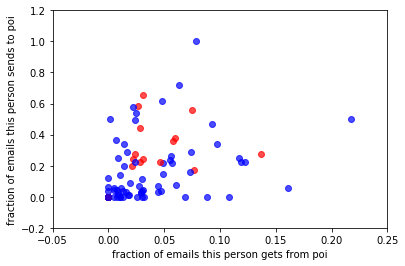

In [48]:
ctr=0
for to_fraction,from_fraction in zip(to_fraction,from_fraction): 
    if (poi[ctr]==True):
        plt.scatter(to_fraction,from_fraction,color='r',alpha=0.7)
    elif (poi[ctr]==False):    
        plt.scatter(to_fraction,from_fraction,color='b',alpha=0.7)
    ctr=ctr+1

plt.xlim([-0.05,0.25])  
plt.ylim([-0.2,1.2])
plt.xlabel('fraction of emails this person gets from poi')
plt.ylabel('fraction of emails this person sends to poi')
plt.show()